# <Font color=Black> Analysing Student's Behaviour </font>

In [1]:
import pandas as pd
import numpy as np
A = pd.read_csv("D:\DATA SCIENCE PROJECTS\MBA SIP PROJECT\Predicting Online Learning Performance.csv")

In [2]:
A.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Exploratory data Analysis(EDA)

In [67]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [16]:
A.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


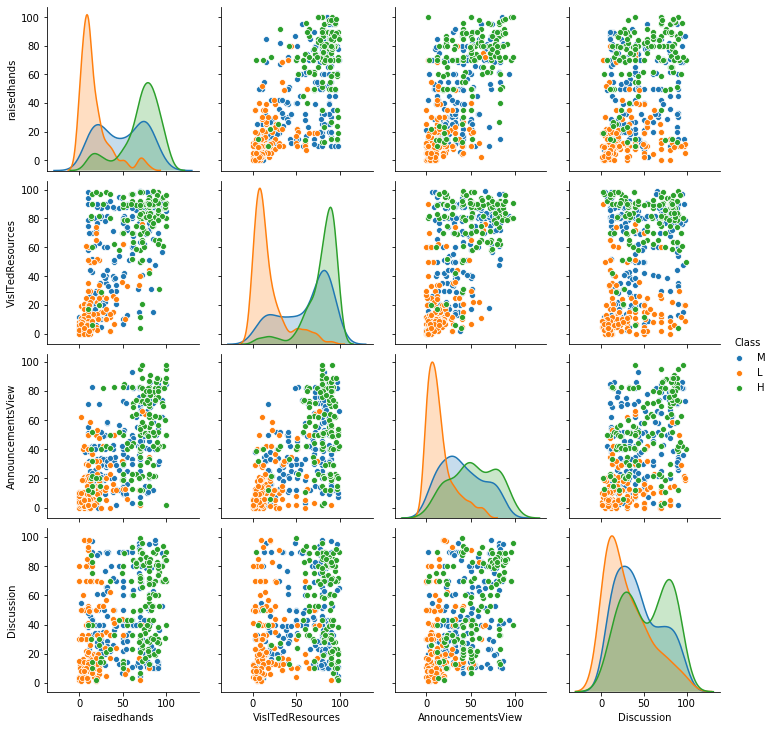

In [14]:
sns.pairplot(A,hue='Class')

# Missing value Analysis

In [68]:
missing_val = A.isna().sum()
missing_val

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Outlier Analysis

raisedhands


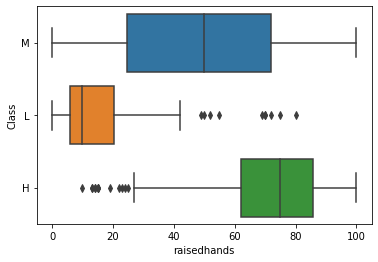

AnnouncementsView


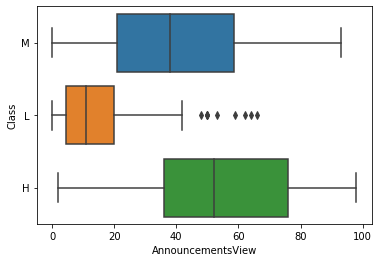

VisITedResources


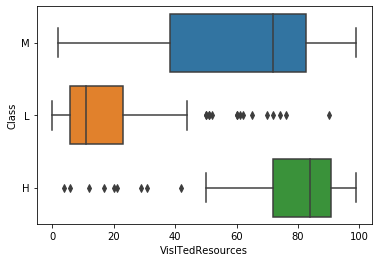

Discussion


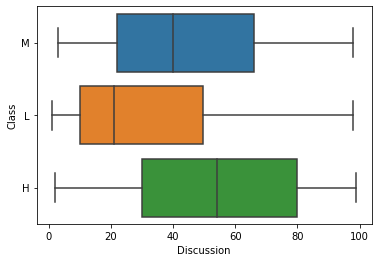

In [61]:
import matplotlib.pyplot as plt
boxplot_lst = ['raisedhands','AnnouncementsView','VisITedResources','Discussion']

for i in range(len(boxplot_lst)):
    print(boxplot_lst[i])
    X = A[boxplot_lst[i]]
    Y = A['Class']
#     plt.subplot(2,2,1)
    sns.boxplot(X,Y)
    plt.show()

# Feature Engineering

In the context to understand the student and his results, setting up a dataframe with certain columns

In [29]:
A = A[['gender','PlaceofBirth','StageID','Topic','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class']]
A.head()

,gender,PlaceofBirth,StageID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,IT,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,IT,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,IT,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,IT,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,IT,40,50,12,50,No,Bad,Above-7,M


In [78]:
A.groupby(['ParentschoolSatisfaction'])['Class'].value_counts(normalize=True)

ParentschoolSatisfaction  Class
Bad                       L        0.446809
                          M        0.425532
                          H        0.127660
Good                      M        0.448630
                          H        0.404110
                          L        0.147260
Name: Class, dtype: float64

In [80]:
A.groupby(['ParentAnsweringSurvey'])['ParentschoolSatisfaction'].value_counts(normalize=True)

ParentAnsweringSurvey  ParentschoolSatisfaction
No                     Bad                         0.690476
                       Good                        0.309524
Yes                    Good                        0.840741
                       Bad                         0.159259
Name: ParentschoolSatisfaction, dtype: float64

#### It seems that parents which aren't envolved in answering the scholar's surveys are likely to become unsatisfied with the School. This can mean that well informed parents can better understand the student's enrollment and reality and are better satisfied.


### <Font color=Browun> We will try to understand the relation between What is the relation between parents and student's classification? </font> 

In [82]:
A.groupby(['ParentAnsweringSurvey'])['Class'].value_counts(normalize=True)

ParentAnsweringSurvey  Class
No                     L        0.471429
                       M        0.395238
                       H        0.133333
Yes                    M        0.474074
                       H        0.422222
                       L        0.103704
Name: Class, dtype: float64

#### So, definitively parent's active behavior has an important role on student's growth.

### <Font color=Browun> Understanding student's behavior </font> 

#### Next, it is important to know what characteristics are linked to students sucess. So, we're going to test the features related.

In [2]:
Stud = A[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
Stud.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,15,16,2,20,Under-7,M
1,M,20,20,3,25,Under-7,M
2,M,10,7,0,30,Above-7,L
3,M,30,25,5,35,Above-7,L
4,M,40,50,12,50,Above-7,M


In [3]:
Stud['raisedhands'] = pd.cut(Stud.raisedhands, bins=3,labels=np.arange(3), right=False)
Stud.groupby(['raisedhands'])['Class'].value_counts(normalize=True)

C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


raisedhands  Class
0            L        0.534314
             M        0.392157
             H        0.073529
1            M        0.577778
             H        0.288889
             L        0.133333
2            H        0.543011
             M        0.424731
             L        0.032258
Name: Class, dtype: float64



So, it seems that students which has low levels of raising hands are most likely to have Low classification. In the otherside, high frequency of raising hands are linked to higher classification.

Next, we're going to check the act of visiting the course resources.


In [24]:
Stud['VisITedResources'] = pd.cut(Stud.VisITedResources, bins=3, labels=np.arange(3), right=False)
Stud.groupby(['VisITedResources'])['Class'].value_counts(normalize=True)

C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


VisITedResources  Class
0                 L        0.656250
                  M        0.293750
                  H        0.050000
1                 M        0.560976
                  H        0.231707
                  L        0.207317
2                 M        0.495798
                  H        0.483193
                  L        0.021008
Name: Class, dtype: float64



Low levels of resource exploring means lower levels of classification. High levels of visiting resources are linked to higher classification.


In [26]:
Stud['AnnouncementsView'] = pd.cut(Stud.AnnouncementsView, bins=3, labels=np.arange(3), right=False)
Stud.groupby(['AnnouncementsView'])['Class'].value_counts(normalize=True)

C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


AnnouncementsView  Class
0                  L        0.468354
                   M        0.388186
                   H        0.143460
1                  M        0.506667
                   H        0.393333
                   L        0.100000
2                  H        0.526882
                   M        0.462366
                   L        0.010753
Name: Class, dtype: float64

The act of visualizing the announcements makes the students more prepared for the tasks and they are most likely to plan the assessments of the week. High visualization frequency is lined, indeed, to better classifications.

In [162]:
Stud['Discussion'] = pd.cut(Stud.Discussion, bins=3, labels=np.arange(3), right=False)
Stud.groupby(['Discussion'])['Class'].value_counts(normalize=True)

Discussion  Class
0           M        0.416290
            L        0.371041
            H        0.212670
1           M        0.538462
            H        0.253846
            L        0.207692
2           H        0.480620
            M        0.379845
            L        0.139535
Name: Class, dtype: float64



Suprisingly, discussion frequency is weakly linked to higher results, at least, directly. Of course, there are higher interactions levels ocrring with Higher graded students but the data shows that discussion is a secondary act

In [165]:
Stud.groupby(['StudentAbsenceDays'])['Class'].value_counts(normalize=True)

StudentAbsenceDays  Class
Above-7             L        0.607330
                    M        0.371728
                    H        0.020942
Under-7             M        0.484429
                    H        0.477509
                    L        0.038062
Name: Class, dtype: float64



As expected, the lower the absence of the student, the higher tends to become their classification.


# Feature Selection



Now that we know what are the important features to understand the student's behavior and classification, we're going to build a dataset for a K-Means algorithm, which will show the student's cluster.

To make the construction process easiest to understand, we're going to reimplement the dataset building phases.


In [4]:
Stud_2 = A[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
Stud_2.tail()


,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
475,F,5,4,5,8,Above-7,L
476,F,50,77,14,28,Under-7,M
477,F,55,74,25,29,Under-7,M
478,F,30,17,14,57,Above-7,L
479,F,35,14,23,62,Above-7,L


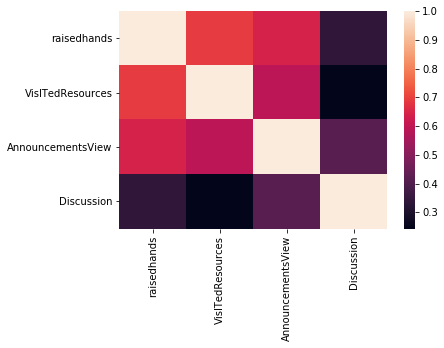

In [6]:
import seaborn as sb
sb.heatmap(Stud_2.corr())

This made clear that our best correlated features are raisedHands and visitedResources, which will compose our model dataset further.

# One Hot Encoding 



So, we need an one hot encoding on columns gender,absence and class


In [7]:
Stud_2 = pd.concat([Stud_2,pd.get_dummies(Stud_2['gender'], prefix='gender_')], axis=1)
Stud_2 = pd.concat([Stud_2,pd.get_dummies(Stud_2['StudentAbsenceDays'], prefix='absence_')], axis=1)
Stud_2 = pd.concat([Stud_2,pd.get_dummies(Stud_2['Class'], prefix='class_')], axis=1)

Stud_2.drop(['gender'], axis = 1,inplace=True)
Stud_2.drop(['StudentAbsenceDays'], axis = 1,inplace=True)
Stud_2.drop(['Class'], axis = 1,inplace=True)


In [8]:
Stud_2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender__F,gender__M,absence__Above-7,absence__Under-7,class__H,class__L,class__M
0,15,16,2,20,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,1,0,0,1
2,10,7,0,30,0,1,1,0,0,1,0
3,30,25,5,35,0,1,1,0,0,1,0
4,40,50,12,50,0,1,1,0,0,0,1


# Modelling

In [8]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = Stud_2[['raisedhands', 'VisITedResources']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
X[:5]

array([[0.15      , 0.16161616],
       [0.2       , 0.2020202 ],
       [0.1       , 0.07070707],
       [0.3       , 0.25252525],
       [0.4       , 0.50505051]])

Using the Elbow Method to find the best K for Kmeans based on our data

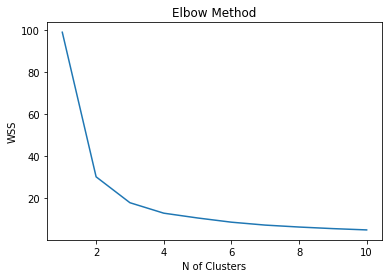

In [181]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    #print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

So, the ideal K is 3. Now we are going to build the Kmeans with k=3

In [182]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [183]:
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

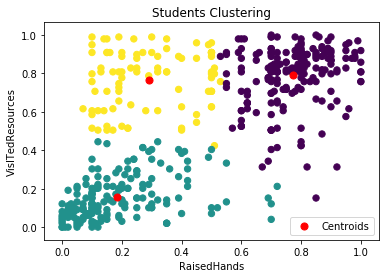

In [193]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 40, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red',label = 'Centroids')
plt.title('Students Clustering')
plt.xlabel('RaisedHands')
plt.ylabel('VisITedResources')
plt.legend()

plt.show()



So, now we can see 3 clusters:

    High applied Students
    Mid Applied Students
    Low Applied Students



# Building a supervised algorithm

Now it's time to build a model to predict the student's classification based on his actions on the Online Learning enviroment.

    K Nearest Neighbor(KNN)
    Decision Tree
    Support Vector Machine
    Logistic Regression



In [51]:
Stud_3 = A[['raisedhands','VisITedResources','AnnouncementsView','Discussion','Class']]
Stud_3.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [356]:
X = Stud_3[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
Y = Stud_3[['Class']]

In [357]:
X.head()
Y.head()

,Class
0,M
1,M
2,L
3,L
4,M


### KNN

In [358]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [359]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [363]:
X = Stud_3[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
Y = Stud_3[['Class']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)                                                                             

In [364]:
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,10,1),"leaf_size":range(2,10,1)}
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = GridSearchCV(knn,tp,scoring='accuracy',cv=5,verbose=2,n_jobs=1)
cvmodel = cv.fit(X,Y.values.ravel())
print(cvmodel.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] leaf_size=2, n_neighbors=2 ......................................
[CV] ....................... leaf_size=2, n_neighbors=2, total=   0.0s
[CV] leaf_size=2, n_neighbors=2 ......................................
[CV] ....................... leaf_size=2, n_neighbors=2, total=   0.0s
[CV] leaf_size=2, n_neighbors=2 ......................................
[CV] ....................... leaf_size=2, n_neighbors=2, total=   0.0s
[CV] leaf_size=2, n_neighbors=2 ......................................
[CV] ....................... leaf_size=2, n_neighbors=2, total=   0.0s
[CV] leaf_size=2, n_neighbors=2 ......................................
[CV] ....................... leaf_size=2, n_neighbors=2, total=   0.0s
[CV] leaf_size=2, n_neighbors=3 ......................................
[CV] ....................... leaf_size=2, n_neighbors=3, total=   0.0s
[CV] leaf_size=2, n_neighbors=3 ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... leaf_size=2, n_neighbors=7, total=   0.0s
[CV] leaf_size=2, n_neighbors=7 ......................................
[CV] ....................... leaf_size=2, n_neighbors=7, total=   0.0s
[CV] leaf_size=2, n_neighbors=7 ......................................
[CV] ....................... leaf_size=2, n_neighbors=7, total=   0.0s
[CV] leaf_size=2, n_neighbors=7 ......................................
[CV] ....................... leaf_size=2, n_neighbors=7, total=   0.0s
[CV] leaf_size=2, n_neighbors=7 ......................................
[CV] ....................... leaf_size=2, n_neighbors=7, total=   0.0s
[CV] leaf_size=2, n_neighbors=8 ......................................
[CV] ....................... leaf_size=2, n_neighbors=8, total=   0.0s
[CV] leaf_size=2, n_neighbors=8 ......................................
[CV] ....................... leaf_size=2, n_neighbors=8, total=   0.0s
[CV] leaf_size=2, n_neighbors=8 ......................................
[CV] .

[CV] ....................... leaf_size=4, n_neighbors=8, total=   0.0s
[CV] leaf_size=4, n_neighbors=8 ......................................
[CV] ....................... leaf_size=4, n_neighbors=8, total=   0.0s
[CV] leaf_size=4, n_neighbors=8 ......................................
[CV] ....................... leaf_size=4, n_neighbors=8, total=   0.0s
[CV] leaf_size=4, n_neighbors=8 ......................................
[CV] ....................... leaf_size=4, n_neighbors=8, total=   0.0s
[CV] leaf_size=4, n_neighbors=9 ......................................
[CV] ....................... leaf_size=4, n_neighbors=9, total=   0.0s
[CV] leaf_size=4, n_neighbors=9 ......................................
[CV] ....................... leaf_size=4, n_neighbors=9, total=   0.0s
[CV] leaf_size=4, n_neighbors=9 ......................................
[CV] ....................... leaf_size=4, n_neighbors=9, total=   0.0s
[CV] leaf_size=4, n_neighbors=9 ......................................
[CV] .

[CV] ....................... leaf_size=6, n_neighbors=3, total=   0.0s
[CV] leaf_size=6, n_neighbors=4 ......................................
[CV] ....................... leaf_size=6, n_neighbors=4, total=   0.0s
[CV] leaf_size=6, n_neighbors=4 ......................................
[CV] ....................... leaf_size=6, n_neighbors=4, total=   0.0s
[CV] leaf_size=6, n_neighbors=4 ......................................
[CV] ....................... leaf_size=6, n_neighbors=4, total=   0.0s
[CV] leaf_size=6, n_neighbors=4 ......................................
[CV] ....................... leaf_size=6, n_neighbors=4, total=   0.0s
[CV] leaf_size=6, n_neighbors=4 ......................................
[CV] ....................... leaf_size=6, n_neighbors=4, total=   0.0s
[CV] leaf_size=6, n_neighbors=5 ......................................
[CV] ....................... leaf_size=6, n_neighbors=5, total=   0.0s
[CV] leaf_size=6, n_neighbors=5 ......................................
[CV] .

[CV] ....................... leaf_size=7, n_neighbors=7, total=   0.0s
[CV] leaf_size=7, n_neighbors=7 ......................................
[CV] ....................... leaf_size=7, n_neighbors=7, total=   0.0s
[CV] leaf_size=7, n_neighbors=8 ......................................
[CV] ....................... leaf_size=7, n_neighbors=8, total=   0.0s
[CV] leaf_size=7, n_neighbors=8 ......................................
[CV] ....................... leaf_size=7, n_neighbors=8, total=   0.0s
[CV] leaf_size=7, n_neighbors=8 ......................................
[CV] ....................... leaf_size=7, n_neighbors=8, total=   0.0s
[CV] leaf_size=7, n_neighbors=8 ......................................
[CV] ....................... leaf_size=7, n_neighbors=8, total=   0.0s
[CV] leaf_size=7, n_neighbors=8 ......................................
[CV] ....................... leaf_size=7, n_neighbors=8, total=   0.0s
[CV] leaf_size=7, n_neighbors=9 ......................................
[CV] .

[CV] ....................... leaf_size=9, n_neighbors=3, total=   0.0s
[CV] leaf_size=9, n_neighbors=3 ......................................
[CV] ....................... leaf_size=9, n_neighbors=3, total=   0.0s
[CV] leaf_size=9, n_neighbors=3 ......................................
[CV] ....................... leaf_size=9, n_neighbors=3, total=   0.0s
[CV] leaf_size=9, n_neighbors=3 ......................................
[CV] ....................... leaf_size=9, n_neighbors=3, total=   0.0s
[CV] leaf_size=9, n_neighbors=4 ......................................
[CV] ....................... leaf_size=9, n_neighbors=4, total=   0.0s
[CV] leaf_size=9, n_neighbors=4 ......................................
[CV] ....................... leaf_size=9, n_neighbors=4, total=   0.0s
[CV] leaf_size=9, n_neighbors=4 ......................................
[CV] ....................... leaf_size=9, n_neighbors=4, total=   0.0s
[CV] leaf_size=9, n_neighbors=4 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.0s finished


In [365]:
knr = KNeighborsClassifier(n_neighbors=7,leaf_size=2,p=2,n_jobs=1)
model = knr.fit(xtrain,ytrain.values.ravel())
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("accuracy_score :- ",accuracy_score(ytest,pred))

accuracy_score :-  0.625


In [366]:
import pickle
file = open("KNN.pkl",'wb')
pickle.dump(model,file)

Split Data into Train and Validation (test)

In [315]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 4) (384, 1)
Test set: (96, 4) (96, 1)


### Decision Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Dtree.fit(X_train,y_train)
Dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Suport Vector Machine - SVM

In [317]:
from sklearn import svm
supMac = svm.SVC(kernel='rbf', gamma='auto')
supMac.fit(X_train, y_train.values.ravel()) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Logistic Regression

In [330]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear', multi_class='auto').fit(X_train,y_train.values.ravel())
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Performance

In [319]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [331]:
accuracy_score(ytest,pred)
print("KNN Accuracy_score",accuracy_score(ytest,pred))
print("KNN F1-score: %.2f" % f1_score(y_test, pred, average='weighted') )

KNN Accuracy_score 0.625
KNN F1-score: 0.27


In [332]:
dtree_yhat = Dtree.predict(X_test)
print("Decision Tree accuracy_score: %.2f" % accuracy_score(y_test, dtree_yhat))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, dtree_yhat, average='weighted') )

Decision Tree accuracy_score: 0.59
Decision Tree F1-score: 0.60


In [333]:
svm_yhat = supMac.predict(X_test)
print("SVM accuracy_score: %.2f" % accuracy_score(y_test, svm_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, svm_yhat, average='weighted') )

SVM accuracy_score: 0.61
SVM F1-score: 0.61


In [334]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR accuracy_score: %.2f" % accuracy_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )

LR accuracy_score: 0.62
LR F1-score: 0.60


# Results and Discussion



The presented research focused in data analytics and building a machine learning model to understand the student's behavior and classification under online learning courses. The results concluded some points:

    Parents active participation and tracking are important. Absent parents are linked to absent students and more      satisfaction with the school.

    Students who read announcements and visit the course resources are most likely to have higher classification.

    Actions related to discussions are less likely to improve student's classification.

As a final result, a predictive model is offered in order to help the online platforms to understand the student's acts and take decisions. The best model was the K-Nearest neighbors with k=4 and accuracy of 0.65 Jaccard Index. Finally, it is important to mention that location data was not possible to be used. That's because it refers to Born location of the student and this is not a important feature. So, it could be a more important data the place where the student was conected, because the high absence levels could be related to poor Internet connection areas, like conflicted-areas and under development countries. So, this research can be used as a starting point for further works and model adaptation.


# Conclusion

Data analytics and Data Science are vital fields for improving Online Courses experience. Set the right content for the right student is a complex but essential task to keep the students enrolled, motivated and getting high classification. This will, with no doubt, improve education levels of their countries and help to improve their economy. Despite that, online learning has a potential value for increasing society levels.